# Convolutional Neural Networks Model for training MNIST Dataset


## Import libraries

In [58]:
import numpy as np
import pandas as pd
#import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

### Loading the MNIST dataset using Keras.

In [59]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [60]:
print(X_train.shape)

(60000, 28, 28)


In [61]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [62]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)

X_train[0].min(), X_train[0].max()

(0.0, 1.0)

## plot the first 10 images on the train set

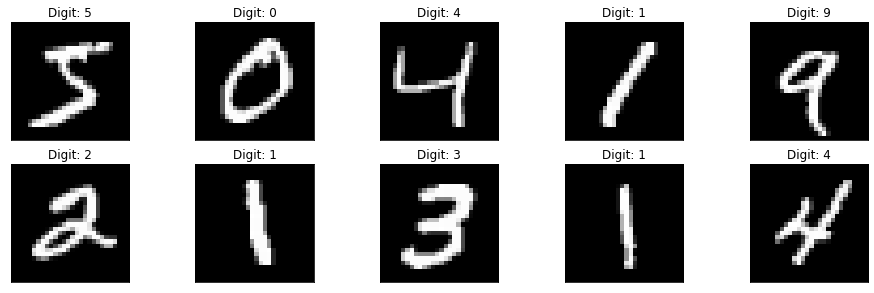

In [37]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])


plt.figure(figsize=(16, 10))
for i in range(10):
    plot_digit(X_train[i], y_train[i], plt, i)
    
plt.show()

# use reshape() function to reshape data

In [63]:
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))

In [64]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

### **Building the model**

In [65]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    Conv2D(16, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(50, activation="relu"),
    Dense(10, activation="softmax")
])

 ## Train the Model

use an SGD optimizer with 0.01 learning rate.

use the sparse_categorical_crossentropy loss because our target values are represented as integers.

In [66]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=optimizer, 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 16)        4624      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 2304)              0         
                                                                 
 dense_12 (Dense)            (None, 50)                115250    
                                                                 
 dense_13 (Dense)            (None, 10)                510       
                                                      

### **Training and testing the model**


In [67]:
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 90s 48ms/step - loss: 0.2077 - accuracy: 0.9354
Epoch 2/5
1875/1875 [==============================] - 89s 48ms/step - loss: 0.0585 - accuracy: 0.9819
Epoch 3/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0395 - accuracy: 0.9880
Epoch 4/5
1875/1875 [==============================] - 89s 48ms/step - loss: 0.0296 - accuracy: 0.9905
Epoch 5/5
1875/1875 [==============================] - 89s 48ms/step - loss: 0.0216 - accuracy: 0.9930


## test dsta with 10 images that set aside on our test set.

1/1 [==============================] - 0s 20ms/step


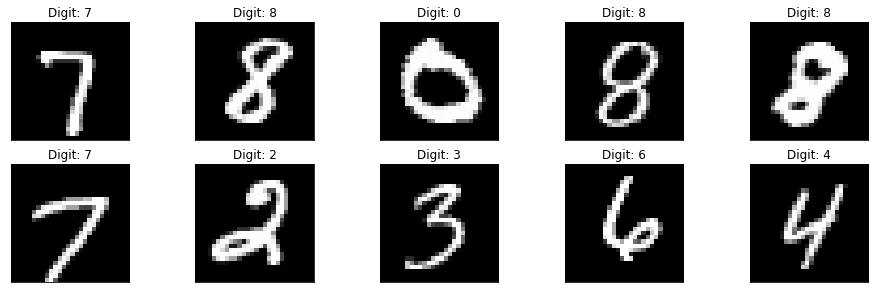

In [68]:
plt.figure(figsize=(16, 10))
for i in range(10):
    image = random.choice(X_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i)

plt.show()

In [69]:
predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, predictions)

313/313 [==============================] - 4s 12ms/step


0.9864